# Branchig ratios

## Width decay of $h \to \nu_i N_j$

\begin{equation}
\begin{aligned}
\Gamma\left(h \rightarrow v N \right) &=\frac{Y_N^2}{8 \pi m_h^3} (m_h^2 - m_N^2)^2
\end{aligned}
\end{equation}

In [1]:
from mpmath import *

In [2]:
mp.dps = 80; mp.pretty = True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def Wh_nuN(mh,Mj,Cij):
    g = (2*80.379)/(246)
    mW = 80.379
    if Mj<mh:
        out = (Cij**2/(8*mp.pi*mh**3))*(mh**2 - Mj**2)**2
    else:
        out = 0.0
    return out

In [5]:
Wh_nuN(125.1,100,0.1)

0.0064876385268286252590368390446904518024266825914312391314374610041188993603118528

Loading data of LFVHD.txt

In [19]:
LFVHD_data = pd.read_csv('LFVHD-3.txt',sep='\t')

In [20]:
convert_to_array = lambda df,col:np.array(list(map(mpf,df[col])))

In [21]:
m6 = convert_to_array(LFVHD_data,'m6')
Whl1l2 = convert_to_array(LFVHD_data,'Whl1l2')
#Whl2l1 = convert_to_array(LFVHD_data,'Whl2l1')
Whl1l3 = convert_to_array(LFVHD_data,'Whl1l3')
#Whl3l1 = convert_to_array(LFVHD_data,'Whl3l1')
Whl2l3 = convert_to_array(LFVHD_data,'Whl2l3')
#Whl3l2 = convert_to_array(LFVHD_data,'Whl3l2')

In [22]:
from Unu_seesaw import YN, Osc_data, mheavy, mlight,mn1,mn6
from sympy import lambdify

In [23]:
Ynu = lambdify([mn1,mn6],YN.subs(Osc_data).subs(mheavy).subs(mlight),'mpmath')

In [24]:
Ynuij = lambda m6,i,j: Ynu(mpf(1e-12),m6)[i,j]

In [25]:
mn = lambda m6: (m6/3, m6/2, m6)
def WhnuN_sum(m6):
    out = 0
    for i in range(3):
        for j in range(3):
            out += Wh_nuN(125.1,mn(m6)[j],Ynuij(m6,i,j))
    return out

## Total width

In [26]:
WidthSM = 0.0032
Whlilj_tot = Whl1l2  + Whl1l3  + Whl2l3  #+ Whl2l1 + Whl3l1 + Whl3l2

In [27]:
WHnuN_tot = np.array([WhnuN_sum(m) for m in m6])

In [28]:
Wtot = (
    Whlilj_tot + 
    abs(WHnuN_tot) + 
    WidthSM
)
#Wtot

## Branching ratios

In [29]:
from OneLoopLFVHD.data import ml

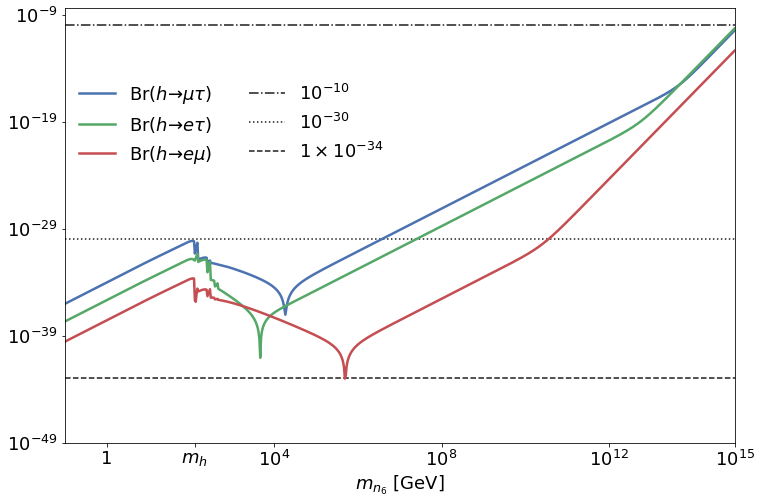

In [35]:
with plt.style.context('seaborn-deep'):
    plt.figure(figsize=(12,8))
    plt.loglog(m6,(
        Whl2l3 #+ Whl3l2
    )/Wtot,label=r'Br$(h \to \mu \tau)$',linewidth=2.5)
    plt.loglog(m6,(
        Whl1l3 #+ Whl3l1
    )/Wtot,label=r'Br$(h \to e \tau)$',linewidth=2.5)
    plt.loglog(m6,(
        Whl1l2 #+ Whl2l1
    )/Wtot,label=r'Br$(h \to e \mu)$',linewidth=2.5)

    #Horizontal lines
    plt.hlines(1e-10,0.1,1e15,color='0.1',linewidth=1.5,linestyles='-.',label=r'$10^{-10}$')
    plt.hlines(1e-30,0.1,1e15,color='0.1',linewidth=1.5,linestyles=':',label=r'$10^{-30}$')
    plt.hlines(1e-43,0.1,1e15,color='0.1',linewidth=1.5,linestyles='--',label=r'$1\times 10^{-34}$')

    #vertical lines
    #plt.vlines(125.1,1e-45,1e-9,linestyles='--',color='r',label=r'$m_h$')

    # A = ml[2]**2*(125.1**2 + 80.379**2)
    # plt.vlines(A,1e-45,1e-9,linestyles='--',color='brown',label=r'$m_{\mu}^2(m_h^2 + m_W^2)$')

    # B = ((ml[2]*ml[1]**2)/(ml[3]**2-ml[1]**2))*(125.1**2 + 80.379**2)
    # plt.vlines(B,1e-44,1e-10,linestyles='--',color='green',label=r'$m_{\mu}^2(m_h^2 + m_W^2)$')

    plt.xticks([1,125.1,1e4,1e8,1e12,1e15],['1','$m_h$','$10^4$','$10^8$','$10^{12}$','$10^{15}$'],fontsize=18)
    plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9],fontsize=18)
    plt.xlim(1e-1,1e15)

    plt.legend(fontsize=18,ncol=2,frameon=False,bbox_to_anchor=(0.5,0.6))
    #plt.ylabel(r'BR($h \to e_a e_b$)',fontsize=18)
    plt.xlabel('$m_{n_6}$ [GeV]',fontsize=18)
    
    plt.savefig('BR_LFVHD-3.png',dpi=200)